# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [4]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x7F9E5A38FA40

In [5]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(
    n_samples=100000,  # число объектов
    n_features=10,  # число признаков
    n_informative=8,  # число информативных признаков
    noise=100,  # уровень шума в данных
    coef=True,  # значение True используется при генерации данных
    random_state=RANDOM_STATE,
)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random() * 0.01


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [16]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ (X.T @ y)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [17]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

Продублируем функцию для вычисления значения MSE из урока

In [8]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1.0 / m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [9]:
def gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        params = params - 2.0 / m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [37]:
import random


def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    j = 0

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = random.randint(0, len(X) - 1)

        # обновите веса, используя сдвиг по градиенту только по объекту X[j] (делить на m в данном случае не нужно)
        params = params - 2.0 / len(X) * learning_rate * (
            X[j].T * ((X[j] @ params) - y[j])
        )
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [ ]:
# **План**

# 1 - находим веса одним из методов

# 2 - применяем функцию prediction для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)

# 3 - вычисляем значение метрики r2

In [10]:
from sklearn.metrics import r2_score

In [61]:
%%time
print(r2_score(y, prediction(X, ols_solution(X, y))))

0.7545142785214091
CPU times: user 62.5 ms, sys: 156 ms, total: 219 ms
Wall time: 42.2 ms


## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [30]:
print(r2_score(y, prediction(X, ols_solution(X, y))))

0.7545142785214091


## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

[[37823.71826921]
 [35809.73965511]
 [33981.61845456]
 ...
 [ 9982.20353127]
 [ 9982.20353127]
 [ 9982.20353127]] [-0.91044256 56.82455793 33.48291813 -0.24065452 39.64529367 -0.13585617
 49.12295947 13.85352141 42.82921217 79.20386231 42.4712069  55.79084759]
CPU times: user 1min 29s, sys: 1min 21s, total: 2min 50s
Wall time: 17.2 s


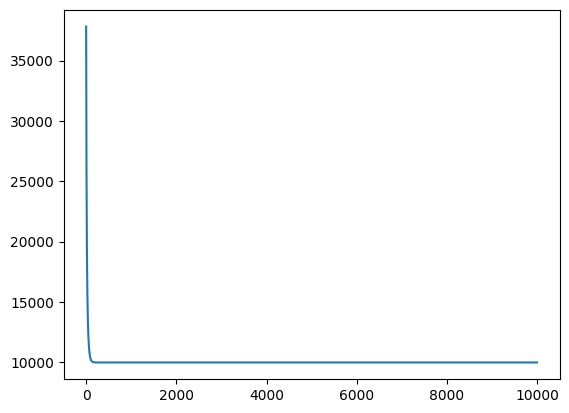

In [56]:
%%time
# your code here
import matplotlib.pyplot as plt
cost_track, params = gradient_descent(X, y, learning_rate=0.01, iterations=10000)
print(cost_track, params)
plt.plot(cost_track)

In [55]:
%%time
# your code for SGD here
cost_track, params = stochastic_gradient_descent(
    X, y, learning_rate=0.01, iterations=10000
)

print(cost_track, params)

[[40347.41024157]
 [40347.34669948]
 [40347.32689686]
 ...
 [40116.11366909]
 [40116.10382382]
 [40116.09070601]] [0.05051825 0.35336419 0.17476472 0.2455011  0.88644379 0.8928028
 0.13623415 0.44457676 1.17124544 0.69682645 0.70827025 0.33886071]
CPU times: user 31.5 s, sys: 33 s, total: 1min 4s
Wall time: 6.58 s


## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [62]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE
)

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred_lin_reg = lin_reg.predict(X_test)

print(r2_score(y_test, pred_lin_reg))

0.6078944086580235


## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [78]:
# ваш код здесь (SGD Regressor)
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(learning_rate='invscaling', eta0 = 0.01, max_iter=10000)
sgd_reg.fit(X_train, y_train)

pred_sgd_reg = sgd_reg.predict(X_test)

print(r2_score(y_test, pred_sgd_reg))

-6.515952230546718e+28


## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

---

LinearRegression

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.

In [ ]:
#R^2 отрицательный и большой - метод расходится (не находит минимум функции потерь)